[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/atmos-cloud-sim-uj/PySDM-examples.git/main?urlpath=PySDM_examples/Shipway_and_Hill_2012/fig_1.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/atmos-cloud-sim-uj/PySDM-examples/blob/main/PySDM_examples/Shipway_and_Hill_2012/fig_1.ipynb)

#### based on Fig. 1 from Shipway & Hill 2012 (Q. J. Royal Meteo. Soc. 138)  "_Diagnosis of systematic differences between multiple parametrizations of warm rain microphysics using a kinematic framework_"   
https://doi.org/10.1002/qj.1913

Including BREAKUP process to demonstrate physical changes to cloud.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# import sys
# if 'google.colab' in sys.modules:
#     !pip --quiet --use-deprecated=legacy-resolver install \
#             PySDM-examples \
#             notebook==`python -c "import notebook; print(notebook.__version__)"` \
#             tornado==`python -c "import tornado; print(tornado.version)"`
#     !ldconfig

In [28]:
from PySDM_examples.deJong_Mackay_2022 import Settings1D, Simulation1D, plot1D
from PySDM.physics import si

## WITHOUT BREAKUP

In [29]:
# WITHOUT BREAKUP
n_sd_per_gridbox = 256
dt = 20*si.s
dz = 100*si.m

output = {}
rho_times_w = 3*si.m/si.s
precip = True
breakup = False
key = f"rhow={rho_times_w}_p={precip}_b={breakup}"
output[key] = Simulation1D(Settings1D(n_sd_per_gridbox=n_sd_per_gridbox, 
    rho_times_w_1=rho_times_w, dt=dt, dz=dz, precip=precip, breakup=breakup)).run().products

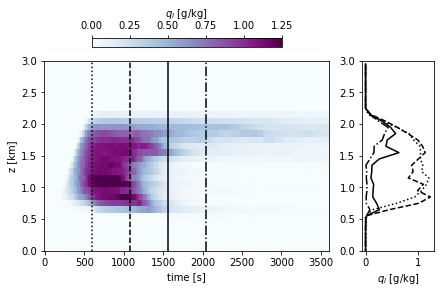

HTML(value="<a href='./ql_rhow=3_p=True_b=False.pdf' target='_blank'>./ql_rhow=3_p=True_b=False.pdf</a><br>")

In [30]:
line={10: ':', 18: '--', 26: '-', 34: '-.'}
plot1D(var='ql', qlabel='$q_l$ [g/kg]', fname=f'figures/ql_rhow={int(rho_times_w)}_p={precip}_b={breakup}.pdf', 
    output=output[f'rhow={int(rho_times_w)}.0_p={precip}_b={breakup}'],vmin=0.0,vmax=1.0,line=line,cmax=1.25)

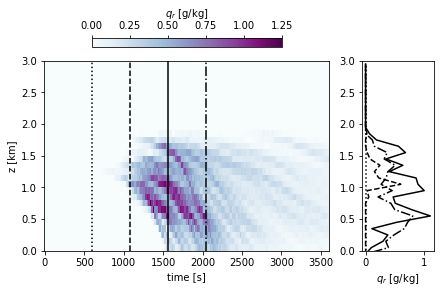

HTML(value="<a href='./qr_rhow=3_p=True_b=False.pdf' target='_blank'>./qr_rhow=3_p=True_b=False.pdf</a><br>")

In [31]:
line={10: ':', 18: '--', 26: '-', 34: '-.'}
plot1D(var='qr', qlabel='$q_r$ [g/kg]', fname=f'figures/qr_rhow={int(rho_times_w)}_p={precip}_b={breakup}.pdf', 
    output=output[f'rhow={int(rho_times_w)}.0_p={precip}_b={breakup}'],vmin=0.0,vmax=1.0,line=line,cmax=1.25)

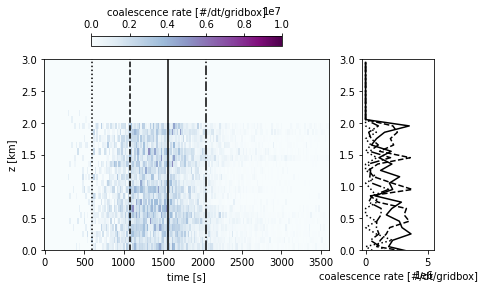

HTML(value="<a href='./coalescence_rate=3_p=True__b=False.pdf' target='_blank'>./coalescence_rate=3_p=True__b=…

In [32]:
line={10: ':', 18: '--', 26: '-', 34: '-.'}
plot1D(var='coalescence_rate', qlabel='coalescence rate [#/dt/gridbox]', fname=f'figures/coalescence_rate={int(rho_times_w)}_p={precip}__b={breakup}.pdf', 
    output=output[f'rhow={int(rho_times_w)}.0_p={precip}_b={breakup}'],vmin=0.0,vmax=1.0,line=line,cmax=1e7)

## WITH BREAKUP

In [34]:
# WITH BREAKUP
import numpy as np
from PySDM.dynamics.collisions.coalescence_efficiencies import ConstEc, Berry1967
from PySDM.dynamics.collisions.breakup_efficiencies import ConstEb
from PySDM.dynamics.collisions.breakup_fragmentations import AlwaysN, ExponFrag, Gaussian

n_sd_per_gridbox = 256
dt = 20*si.s
dz = 100*si.m

frag_scale_r = 30*si.um
frag_scale_v = frag_scale_r**3*4/3*np.pi

output2 = {}
rho_times_w = 3*si.m/si.s
precip = True
breakup = True
key = f"rhow={rho_times_w}_p={precip}_b={breakup}"
settings = Settings1D(n_sd_per_gridbox=n_sd_per_gridbox, rho_times_w_1=rho_times_w, 
    dt=dt, dz=dz, precip=precip, breakup=breakup)
settings.coalescence_efficiency=ConstEc(Ec=0.95)
#settings.coalescence_efficiency=Berry1967()
settings.breakup_efficiency=ConstEb(Eb=1.0)
#settings.fragmentation_function=ExponFrag(scale=frag_scale_v, vmin=(1*si.um)**3, nfmax=10)
settings.fragmentation_function=Gaussian(mu=frag_scale_v, sigma=frag_scale_v/2.5, vmin=(1*si.um)**3, nfmax=10)
#settings.fragmentation_function=AlwaysN(n=4)
settings.warn_breakup_overflow=False
other_label = "Ec=95_gauss10"
output2[key] = Simulation1D(settings).run().products


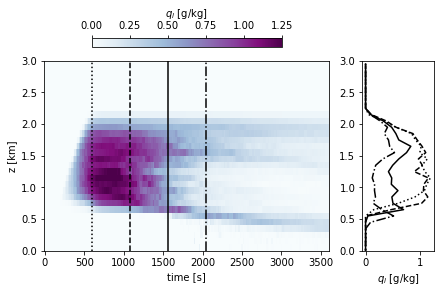

HTML(value="<a href='./ql_rhow=3_p=True_b=True_Ec=95_gauss10.pdf' target='_blank'>./ql_rhow=3_p=True_b=True_Ec…

In [18]:
line={10: ':', 18: '--', 26: '-', 34: '-.'}
plot1D(var='ql', qlabel='$q_l$ [g/kg]', fname=f'figures/ql_rhow={int(rho_times_w)}_p={precip}_b={breakup}_'+other_label+'.pdf', 
    output=output2[f'rhow={int(rho_times_w)}.0_p={precip}_b={breakup}'],vmin=0.0,vmax=1.0,line=line,cmax=1.25)

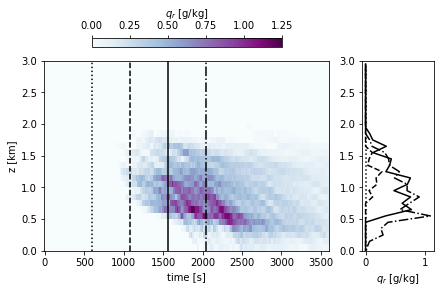

HTML(value="<a href='./qr_rhow=3_p=True__b=True_Ec=95_gauss10.pdf' target='_blank'>./qr_rhow=3_p=True__b=True_…

In [19]:
line={10: ':', 18: '--', 26: '-', 34: '-.'}
plot1D(var='qr', qlabel='$q_r$ [g/kg]', fname=f'figures/qr_rhow={int(rho_times_w)}_p={precip}__b={breakup}_'+other_label+'.pdf', 
    output=output2[f'rhow={int(rho_times_w)}.0_p={precip}_b={breakup}'],vmin=0.0,vmax=1.0,line=line,cmax=1.25)

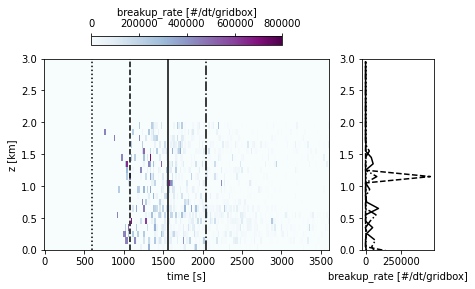

HTML(value="<a href='./breakup_rate=3_p=True__b=True_Ec=95_gauss10.pdf' target='_blank'>./breakup_rate=3_p=Tru…

In [24]:
line={10: ':', 18: '--', 26: '-', 34: '-.'}
plot1D(var='breakup_rate', qlabel='breakup_rate [#/dt/gridbox]', fname=f'figures/breakup_rate={int(rho_times_w)}_p={precip}__b={breakup}_'+other_label+'.pdf', 
    output=output2[f'rhow={int(rho_times_w)}.0_p={precip}_b={breakup}'],vmin=0.0,vmax=20.0,line=line,cmax=8e5)

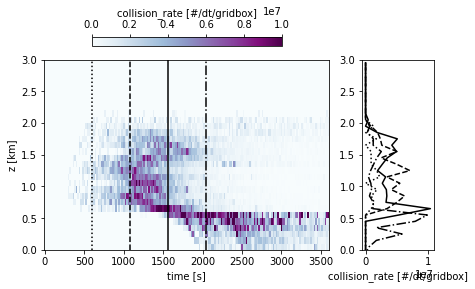

HTML(value="<a href='./collision_rate=3_p=True__b=True_Ec=95_gauss10.pdf' target='_blank'>./collision_rate=3_p…

In [26]:
line={10: ':', 18: '--', 26: '-', 34: '-.'}
plot1D(var='collision_rate', qlabel='collision_rate [#/dt/gridbox]', fname=f'figures/collision_rate={int(rho_times_w)}_p={precip}__b={breakup}_'+other_label+'.pdf', 
    output=output2[f'rhow={int(rho_times_w)}.0_p={precip}_b={breakup}'],vmin=0.0,vmax=20.0,line=line,cmax=1e7)

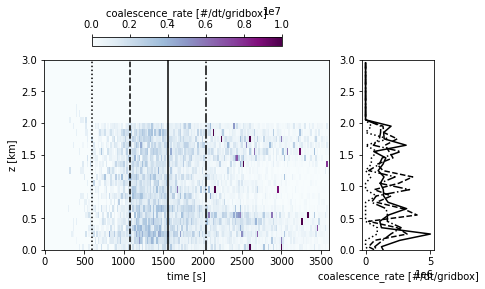

HTML(value="<a href='./coalescence_rate=3_p=True__b=True_Ec=95_gauss10.pdf' target='_blank'>./coalescence_rate…

In [27]:
line={10: ':', 18: '--', 26: '-', 34: '-.'}
plot1D(var='coalescence_rate', qlabel='coalescence_rate [#/dt/gridbox]', fname=f'figures/coalescence_rate={int(rho_times_w)}_p={precip}__b={breakup}_'+other_label+'.pdf', 
    output=output2[f'rhow={int(rho_times_w)}.0_p={precip}_b={breakup}'],vmin=0.0,vmax=20.0,line=line,cmax=1e7)

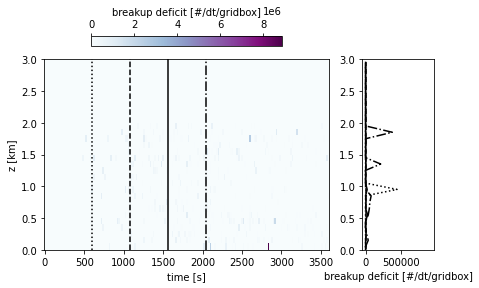

HTML(value="<a href='./breakup_deficit=3_p=True__b=True_Ec=95_gauss10.pdf' target='_blank'>./breakup_deficit=3…

In [36]:
line={10: ':', 18: '--', 26: '-', 34: '-.'}
plot1D(var='breakup_deficit', qlabel='breakup deficit [#/dt/gridbox]', fname=f'figures/breakup_deficit={int(rho_times_w)}_p={precip}__b={breakup}_'+other_label+'.pdf', 
    output=output2[f'rhow={int(rho_times_w)}.0_p={precip}_b={breakup}'],vmin=0.0,vmax=20.0,line=line)